In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

# Data

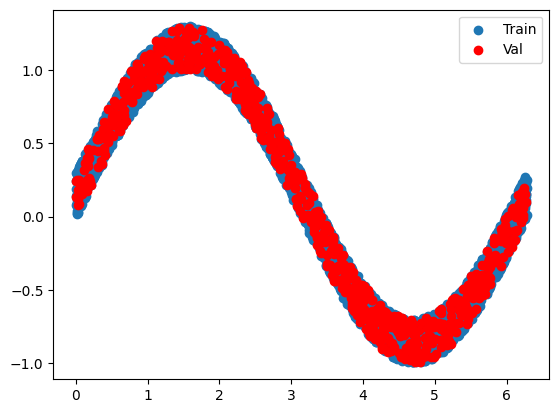

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True, drop_last=True)

# Deep ensemble

In [5]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

Epoch: 49 :::: Train loss 0.008405975997447968 :::: Val loss 0.007953046821057796 

Epoch: 98 :::: Train loss 0.008451984263956547 :::: Val loss 0.008795623667538166 

Epoch: 49 :::: Train loss 0.013567156158387661 :::: Val loss 0.02011188492178917 

Epoch: 98 :::: Train loss 0.009222069755196571 :::: Val loss 0.009223316796123981 

Epoch: 49 :::: Train loss 0.0091329924762249 :::: Val loss 0.008319109678268433 

Epoch: 98 :::: Train loss 0.008158176206052303 :::: Val loss 0.00812819879502058 

Epoch: 50 :::: Train loss 0.009214205667376518 :::: Val loss 0.008281213231384754 

Epoch: 100 :::: Train loss 0.008879663422703743 :::: Val loss 0.007986482232809067 



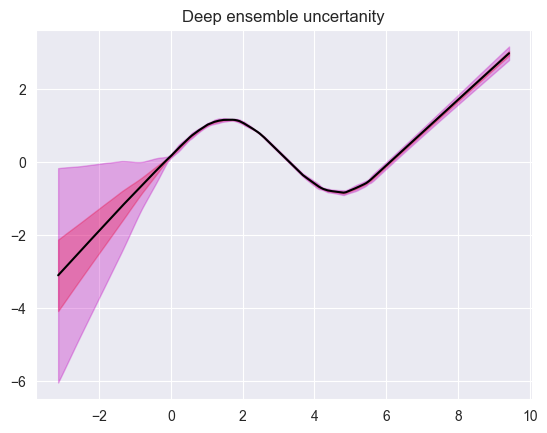

In [ ]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble uncertanity')

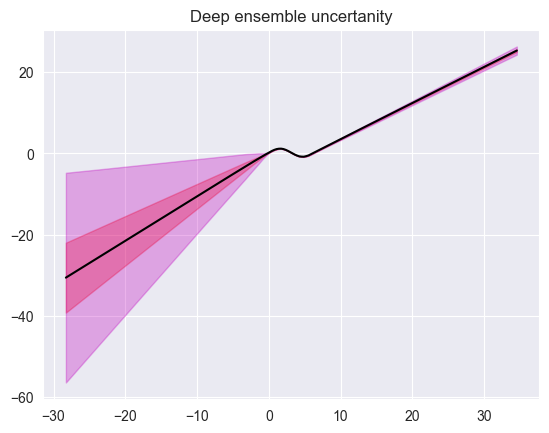

In [ ]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble uncertanity')

# Masksemble

In [ ]:
mask_model = MLP_Maksembles(4,2.0) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.02230752818286419 :::: Val loss 0.02359429933130741 

Epoch: 20 :::: Train loss 0.012228470295667648 :::: Val loss 0.011816389858722687 

Epoch: 30 :::: Train loss 0.011477927677333355 :::: Val loss 0.012608303688466549 

Epoch: 40 :::: Train loss 0.010237308219075203 :::: Val loss 0.011516894213855267 

Epoch: 50 :::: Train loss 0.010780258104205132 :::: Val loss 0.010034109465777874 

Epoch: 60 :::: Train loss 0.010365094989538193 :::: Val loss 0.010727514512836933 

Epoch: 70 :::: Train loss 0.010589049197733402 :::: Val loss 0.010233921930193901 

Epoch: 80 :::: Train loss 0.0097645940259099 :::: Val loss 0.010407952591776848 

Epoch: 90 :::: Train loss 0.010167811065912247 :::: Val loss 0.011921712197363377 

Epoch: 100 :::: Train loss 0.010060085915029049 :::: Val loss 0.009449359029531479 



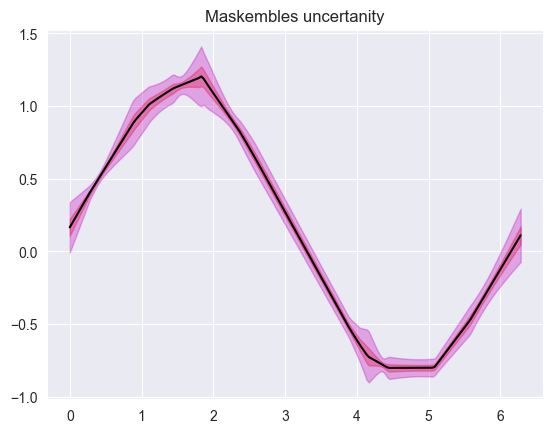

In [ ]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)


y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles uncertanity')

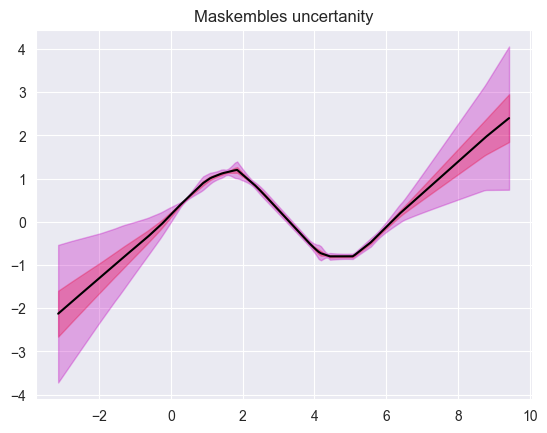

In [ ]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)


y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles uncertanity')


# Dropout

In [ ]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.03905004262924194 :::: Val loss 0.015081645920872688 

Epoch: 20 :::: Train loss 0.03711911290884018 :::: Val loss 0.015031209215521812 

Epoch: 30 :::: Train loss 0.03372684121131897 :::: Val loss 0.014762570150196552 

Epoch: 40 :::: Train loss 0.03755388408899307 :::: Val loss 0.014418129809200764 

Epoch: 50 :::: Train loss 0.039665061980485916 :::: Val loss 0.016168292611837387 

Epoch: 60 :::: Train loss 0.035730600357055664 :::: Val loss 0.016870450228452682 

Epoch: 70 :::: Train loss 0.032764170318841934 :::: Val loss 0.01429892610758543 

Epoch: 80 :::: Train loss 0.03137639909982681 :::: Val loss 0.012931221164762974 

Epoch: 90 :::: Train loss 0.031845204532146454 :::: Val loss 0.014561333693563938 

Epoch: 100 :::: Train loss 0.032197244465351105 :::: Val loss 0.018396694213151932 



In [ ]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

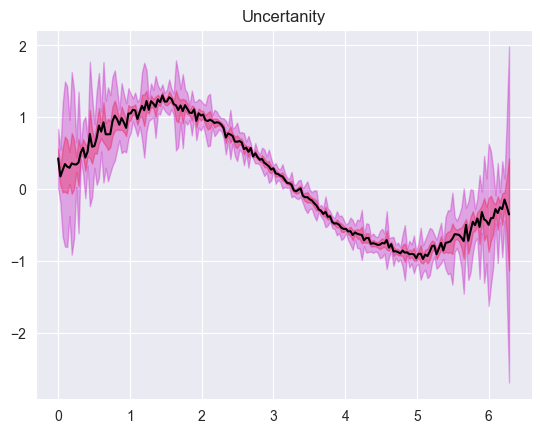

In [ ]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)
N_model = 4

y_model = drop_model(x_plot.to('cuda'))
for i in range(N_model-1):
    y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout uncertanity')

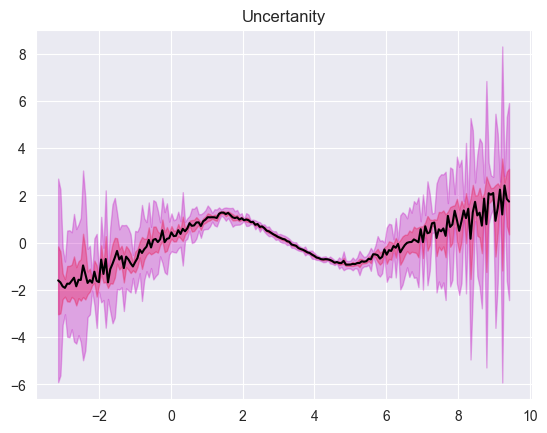

In [ ]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout uncertanity')